## Import libraries

In [1]:
# %pip install "segment-geospatial[samgeo3]"

In [2]:
import os
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from samgeo import SamGeo3

root_dir = "/beegfs/halder/GITHUB/RESEARCH/INDI-Res/"
os.chdir(root_dir)
load_dotenv()

True

## Define the file path

In [3]:
waterbody_file_path = os.path.join(root_dir, 'data', 'raw', 'waterbody.tif')
field_boundary_file_path = os.path.join(root_dir, 'data', 'raw', 'field_boundary.tif')

with rio.open(waterbody_file_path, 'r') as src:
    waterbody_image = src.read([1, 2, 3])
    waterbody_meta = src.meta
    
with rio.open(field_boundary_file_path, 'r') as src:
    field_boundary_image = src.read([1, 2, 3])
    field_boundary_meta = src.meta

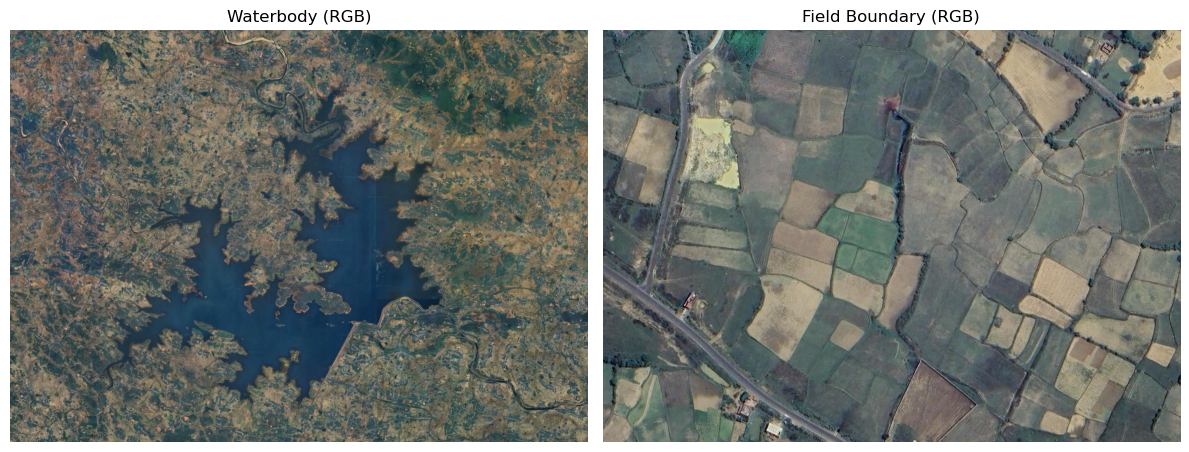

In [4]:
# Plot the images
# Convert to channel-last
waterbody_rgb = np.transpose(waterbody_image, (1, 2, 0))
field_boundary_rgb = np.transpose(field_boundary_image, (1, 2, 0))

def normalize_rgb(img):
    img = img.astype('float32')
    img_min, img_max = img.min(), img.max()
    return (img - img_min) / (img_max - img_min)

waterbody_rgb = normalize_rgb(waterbody_rgb)
field_boundary_rgb = normalize_rgb(field_boundary_rgb)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(waterbody_rgb)
axes[0].set_title("Waterbody (RGB)")
axes[0].axis("off")

axes[1].imshow(field_boundary_rgb)
axes[1].set_title("Field Boundary (RGB)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

## Request access to SAM3

In [5]:
from huggingface_hub import login
login(token=os.getenv('HF_TOKEN'))

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


## Initiailize SAM3

In [7]:
sam3 = SamGeo3(backend='transformers', device=None, checkpoint_path=None, load_from_HF=True)

Using cuda device and transformers backend


config.json:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/1468 [00:00<?, ?it/s]

processor_config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

## Set the image

In [15]:
sam3.set_image(waterbody_file_path)

## Generate masks with text prompt

In [17]:
sam3.generate_masks(prompt="waterbody")

Found one object.


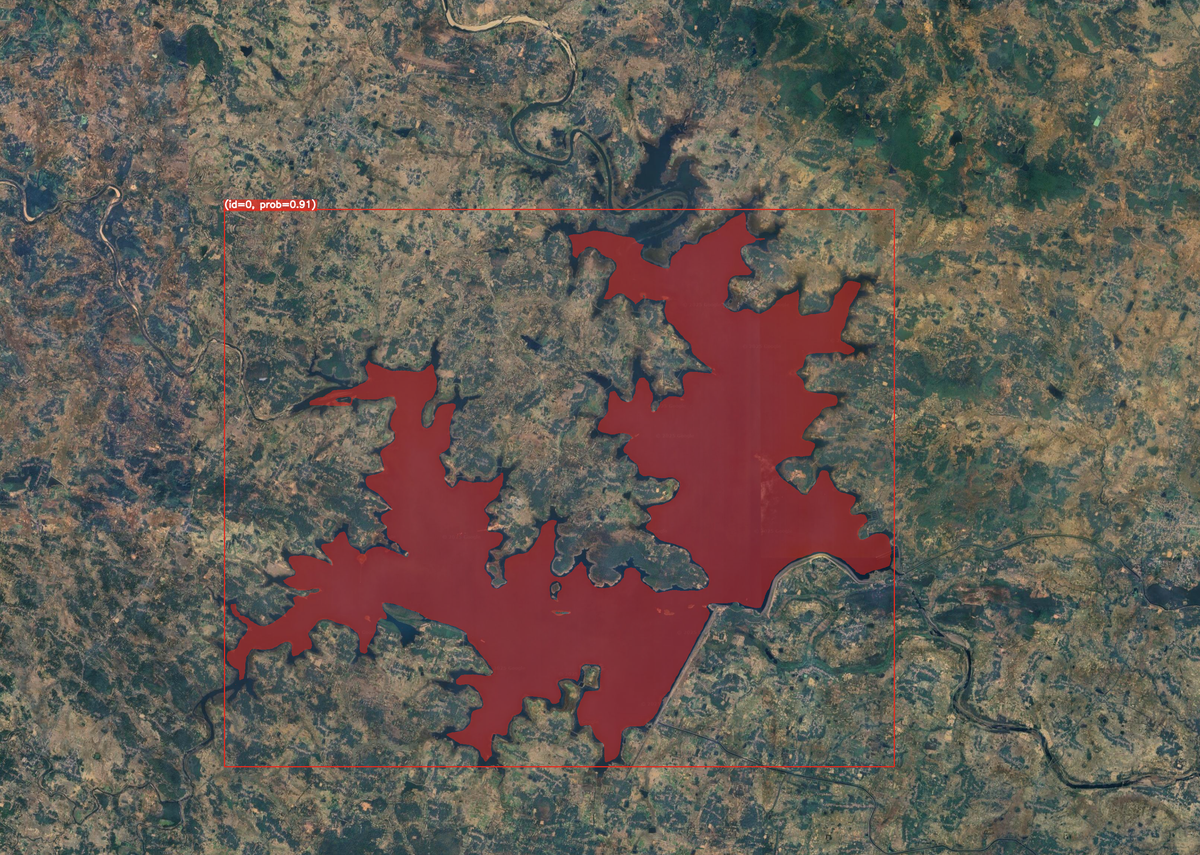

In [18]:
sam3.show_anns()

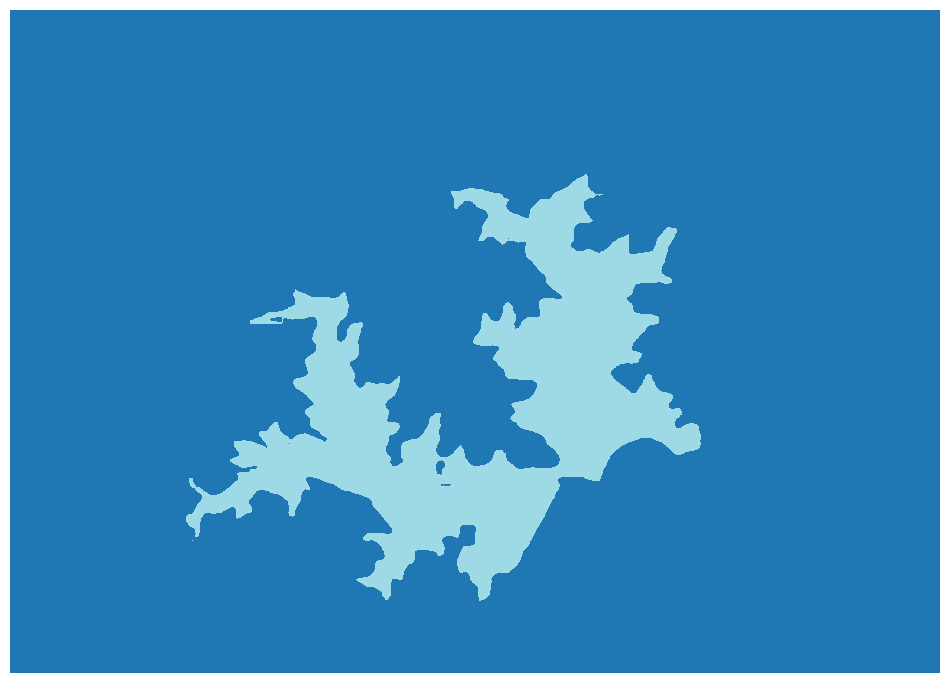

In [19]:
sam3.show_masks()